### Assignment 2 (VOL) - Robo Advisors & Systematic Trading
### Name: Shravan Khunti
### NET ID: ssk10036
### MS in Data Science
### NYU Center for Data Sciene

---
### Let's run the homework datasheet.

In [62]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\shrav\Downloads\assignment_VOL_data (3).xlsx"
df = pd.read_excel(file_path, sheet_name="sp")

# Display the first few rows to check the structure
df.head()

,Date,Close,daily % chg,20day vol,previous 20d return,next 20 day return,zvol20,zfret20,zret20
0,1960-01-04,59.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-01-05,60.389999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-06,60.130001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-01-07,59.689999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-01-08,59.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Computing Daily Returns (The first cell in daily % chg will be NaN because a previous day's closing price is required to calculate daily % chg)

In [63]:
# Compute daily percentage change
df["daily % chg"] = df["Close"].pct_change() * 100

# Verify the first few rows
df[["Date", "Close", "daily % chg"]].head(10)

,Date,Close,daily % chg
0,1960-01-04,59.910000,NaN
1,1960-01-05,60.389999,0.801200
2,1960-01-06,60.130001,-0.430532
3,1960-01-07,59.689999,-0.731751
4,1960-01-08,59.500000,-0.318310
5,1960-01-11,58.770000,-1.226891
6,1960-01-12,58.410000,-0.612557
7,1960-01-13,58.080002,-0.564968
8,1960-01-14,58.400002,0.550964
9,1960-01-15,58.380001,-0.034248


---
### Computing 20-Day Volatility (vol20) (Shifted by 1 row because 20 values are required. The calculation includes 20 values + 1 NaN + 1 vol20 value = 22. The first value will appear at index 21 in Pandas, as indexing starts from 0, meaning it will be in the 22nd row)

In [64]:
# Compute 20-day rolling volatility of daily returns
df["20day vol"] = df["daily % chg"].rolling(window=20).std().shift(1)

# Verify that `20day vol` starts at row 22 (index 21 in Pandas)
df[["Date", "Close", "daily % chg", "20day vol"]].head(25)

,Date,Close,daily % chg,20day vol
0,1960-01-04,59.910000,NaN,NaN
1,1960-01-05,60.389999,0.801200,NaN
2,1960-01-06,60.130001,-0.430532,NaN
3,1960-01-07,59.689999,-0.731751,NaN
4,1960-01-08,59.500000,-0.318310,NaN
5,1960-01-11,58.770000,-1.226891,NaN
6,1960-01-12,58.410000,-0.612557,NaN
7,1960-01-13,58.080002,-0.564968,NaN
8,1960-01-14,58.400002,0.550964,NaN
9,1960-01-15,58.380001,-0.034248,NaN


---
### Computing Previous 20 days return (First value will appear like last time in 22nd row (Excel) and as per Python it will be in Index 21)

In [65]:
# Compute 20-day historical return (previous 20d return)
df["previous 20d return"] = (df["Close"] / df["Close"].shift(21) - 1) * 100

# Verify if `previous 20d return` now has valid values
df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return"]].head(25)

,Date,Close,daily % chg,20day vol,previous 20d return
0,1960-01-04,59.910000,NaN,NaN,NaN
1,1960-01-05,60.389999,0.801200,NaN,NaN
2,1960-01-06,60.130001,-0.430532,NaN,NaN
3,1960-01-07,59.689999,-0.731751,NaN,NaN
4,1960-01-08,59.500000,-0.318310,NaN,NaN
5,1960-01-11,58.770000,-1.226891,NaN,NaN
6,1960-01-12,58.410000,-0.612557,NaN,NaN
7,1960-01-13,58.080002,-0.564968,NaN,NaN
8,1960-01-14,58.400002,0.550964,NaN,NaN
9,1960-01-15,58.380001,-0.034248,NaN,NaN


---
### Compute next 20 day return (LAST 20 values are NaN)

In [66]:
# Correcting the next 20-day return (fret20) calculation based on Excel logic
df.loc[21:, "next 20 day return"] = (df["Close"].shift(-20) / df["Close"] - 1) * 100

# Verify the first few rows
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return"]].head(30))
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return"]].tail(30))

         Date      Close  daily % chg  20day vol  previous 20d return  \
0  1960-01-04  59.910000          NaN        NaN                  NaN   
1  1960-01-05  60.389999     0.801200        NaN                  NaN   
2  1960-01-06  60.130001    -0.430532        NaN                  NaN   
3  1960-01-07  59.689999    -0.731751        NaN                  NaN   
4  1960-01-08  59.500000    -0.318310        NaN                  NaN   
5  1960-01-11  58.770000    -1.226891        NaN                  NaN   
6  1960-01-12  58.410000    -0.612557        NaN                  NaN   
7  1960-01-13  58.080002    -0.564968        NaN                  NaN   
8  1960-01-14  58.400002     0.550964        NaN                  NaN   
9  1960-01-15  58.380001    -0.034248        NaN                  NaN   
10 1960-01-18  57.889999    -0.839332        NaN                  NaN   
11 1960-01-19  57.270000    -1.070995        NaN                  NaN   
12 1960-01-20  57.070000    -0.349223        NaN   

---
### Computing zvol20 (first value from row 272 (271 index as per pandas)

In [67]:
# Compute z-score for 20-day volatility (zvol20)
df["zvol20"] = (df["20day vol"] - df["20day vol"].rolling(250).mean()) / df["20day vol"].rolling(250).std()

# Ensure that zvol20 starts at row 272 (index 271 in Pandas)
df.loc[:270, "zvol20"] = None  

# Verify if zvol20 starts correctly
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20"]].head(273))

          Date      Close  daily % chg  20day vol  previous 20d return  \
0   1960-01-04  59.910000          NaN        NaN                  NaN   
1   1960-01-05  60.389999     0.801200        NaN                  NaN   
2   1960-01-06  60.130001    -0.430532        NaN                  NaN   
3   1960-01-07  59.689999    -0.731751        NaN                  NaN   
4   1960-01-08  59.500000    -0.318310        NaN                  NaN   
..         ...        ...          ...        ...                  ...   
268 1961-01-25  60.529999     0.132337   0.433746             5.379527   
269 1961-01-26  60.619999     0.148687   0.433848             5.389428   
270 1961-01-27  61.240002     1.022770   0.431942             5.988237   
271 1961-01-30  61.970001     1.192030   0.463927             6.752803   
272 1961-01-31  61.779999    -0.306603   0.505493             6.315605   

     next 20 day return    zvol20  
0                   NaN       NaN  
1                   NaN       NaN  
2  

---
### Computing zfret20 (No values for the last 20 days)

In [74]:
# Compute z-score for 20-day future return (zfret20)
df["zfret20"] = (df["next 20 day return"] - df["next 20 day return"].rolling(250).mean()) / df["next 20 day return"].rolling(250).std()

# Ensure that zfret20 starts at row 272 (index 271 in Pandas)
df.loc[:270, "zfret20"] = None  

# Ensure the last 20 rows are NaN (since `fret20` is unavailable for them)
df.loc[df.index[-20:], "zfret20"] = None  

# Verify if zfret20 starts correctly and ends with NaN
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20", "zfret20"]].head(273))
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20", "zfret20"]].tail(23))

          Date      Close  daily % chg  20day vol  previous 20d return  \
0   1960-01-04  59.910000          NaN        NaN                  NaN   
1   1960-01-05  60.389999     0.801200        NaN                  NaN   
2   1960-01-06  60.130001    -0.430532        NaN                  NaN   
3   1960-01-07  59.689999    -0.731751        NaN                  NaN   
4   1960-01-08  59.500000    -0.318310        NaN                  NaN   
..         ...        ...          ...        ...                  ...   
268 1961-01-25  60.529999     0.132337   0.433746             5.379527   
269 1961-01-26  60.619999     0.148687   0.433848             5.389428   
270 1961-01-27  61.240002     1.022770   0.431942             5.988237   
271 1961-01-30  61.970001     1.192030   0.463927             6.752803   
272 1961-01-31  61.779999    -0.306603   0.505493             6.315605   

     next 20 day return    zvol20   zfret20  
0                   NaN       NaN       NaN  
1                  

---
### zret20 (Starts at row 272, requiring 250 trailing vol20 values for normalization)

In [75]:
# Compute z-score for 20-day historical return (zret20)
df["zret20"] = (df["previous 20d return"] - df["previous 20d return"].rolling(250).mean()) / df["previous 20d return"].rolling(250).std()

# Ensure that zret20 starts at row 272 (index 271 in Pandas)
df.loc[:270, "zret20"] = None  

# Verify if zret20 starts correctly
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20", "zfret20", "zret20"]].head(273))
print(df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20", "zfret20", "zret20"]].tail(23))

          Date      Close  daily % chg  20day vol  previous 20d return  \
0   1960-01-04  59.910000          NaN        NaN                  NaN   
1   1960-01-05  60.389999     0.801200        NaN                  NaN   
2   1960-01-06  60.130001    -0.430532        NaN                  NaN   
3   1960-01-07  59.689999    -0.731751        NaN                  NaN   
4   1960-01-08  59.500000    -0.318310        NaN                  NaN   
..         ...        ...          ...        ...                  ...   
268 1961-01-25  60.529999     0.132337   0.433746             5.379527   
269 1961-01-26  60.619999     0.148687   0.433848             5.389428   
270 1961-01-27  61.240002     1.022770   0.431942             5.988237   
271 1961-01-30  61.970001     1.192030   0.463927             6.752803   
272 1961-01-31  61.779999    -0.306603   0.505493             6.315605   

     next 20 day return    zvol20   zfret20    zret20  
0                   NaN       NaN       NaN       NaN  

---
### Just Exporting Data in Excel for future records :)

In [48]:
# Define the output file name
output_file = r"C:\Users\shrav\Downloads\check1.xlsx"

# Save the DataFrame to an Excel file
df[["Date", "Close", "daily % chg", "20day vol", "previous 20d return", "next 20 day return", "zvol20", "zfret20", "zret20"]].to_excel(output_file, index=False)

print(f"Data has been saved to {output_file}")

Data has been saved to C:\Users\shrav\Downloads\check1.xlsx


---
### Part (A) : The analysis segments **zvol20** into quintiles, calculates the average **zret20** and **zfret20** for each, and plots their relationships to examine concurrent and lead-lag effects of volatility on returns 

C:\Users\shrav\AppData\Local\Temp\ipykernel_42920\1177995157.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_summary = df_sorted.groupby("vol_quintile").agg(


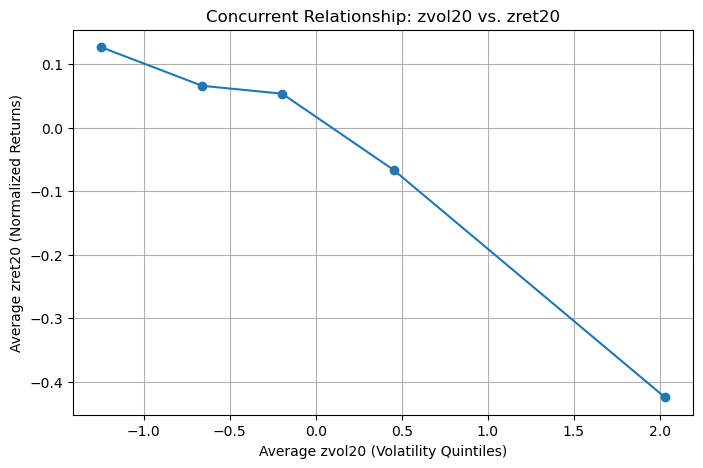

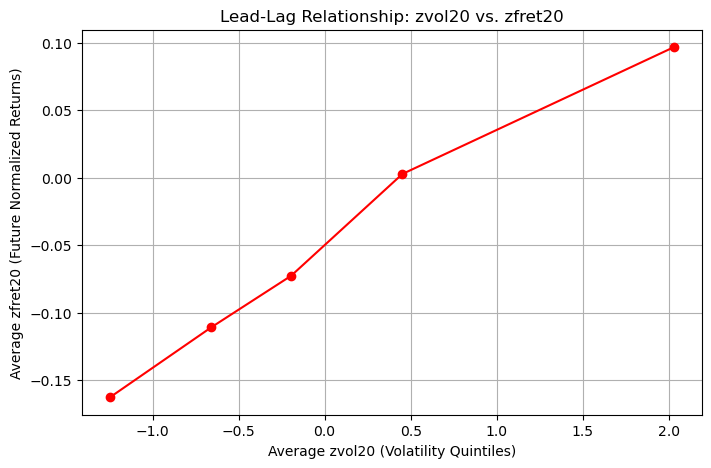

  vol_quintile  avg_zvol20  avg_zret20  avg_zfret20
0            1   -1.247068    0.127056    -0.162633
1            2   -0.660547    0.066279    -0.110959
2            3   -0.195219    0.053770    -0.072644
3            4    0.451588   -0.066281     0.002822
4            5    2.028255   -0.424678     0.096764


In [76]:
import tools

# Use the correct DataFrame name for processing
df_sorted = df.dropna(subset=["zvol20"]).sort_values(by="zvol20")
df_sorted["vol_quintile"] = pd.qcut(df_sorted["zvol20"], 5, labels=[1, 2, 3, 4, 5])

# Calculate mean zvol20, zret20, and zfret20 for each quintile
quintile_summary = df_sorted.groupby("vol_quintile").agg(
    avg_zvol20=("zvol20", "mean"),
    avg_zret20=("zret20", "mean"),
    avg_zfret20=("zfret20", "mean")
).reset_index()

# Plot relationship between zvol20 and zret20 (concurrent relationship)
plt.figure(figsize=(8, 5))
plt.plot(quintile_summary["avg_zvol20"], quintile_summary["avg_zret20"], marker="o", linestyle="-")
plt.xlabel("Average zvol20 (Volatility Quintiles)")
plt.ylabel("Average zret20 (Normalized Returns)")
plt.title("Concurrent Relationship: zvol20 vs. zret20")
plt.grid(True)
plt.show()

# Plot relationship between zvol20 and zfret20 (lead-lag relationship)
plt.figure(figsize=(8, 5))
plt.plot(quintile_summary["avg_zvol20"], quintile_summary["avg_zfret20"], marker="o", linestyle="-", color="red")
plt.xlabel("Average zvol20 (Volatility Quintiles)")
plt.ylabel("Average zfret20 (Future Normalized Returns)")
plt.title("Lead-Lag Relationship: zvol20 vs. zfret20")
plt.grid(True)
plt.show()

# Display the quintile summary using a standard print statement
print(quintile_summary)

---
## Analyzing the concurrent and lead-lag relationships between volatility (5-day, 10-day, 20-day) and normalized returns by segmenting into quintiles and plotting overlays

C:\Users\shrav\AppData\Local\Temp\ipykernel_42920\3395721148.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_summary_5 = df_sorted_5.groupby("vol5_quintile").agg(
C:\Users\shrav\AppData\Local\Temp\ipykernel_42920\3395721148.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_summary_10 = df_sorted_10.groupby("vol10_quintile").agg(


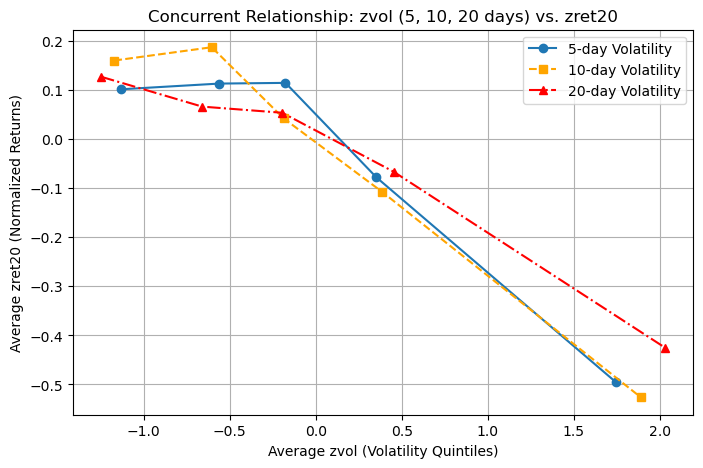

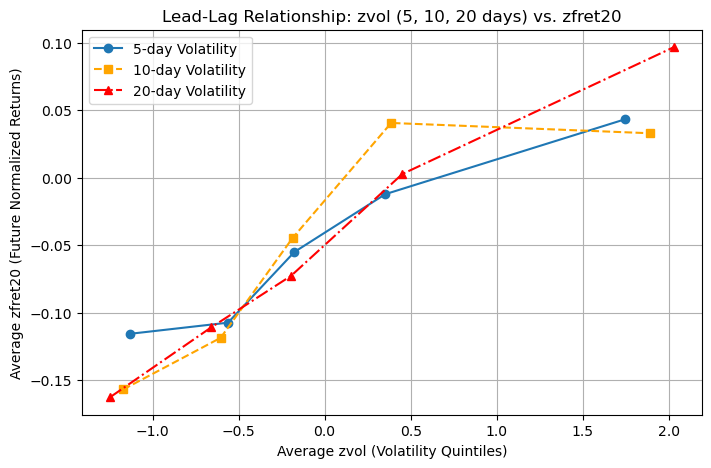

In [78]:
# Ensure 5-day and 10-day volatility are calculated
df["vol5"] = df["daily % chg"].rolling(window=5).std()
df["vol10"] = df["daily % chg"].rolling(window=10).std()

# Compute z-scores for vol5 and vol10
df["zvol5"] = (df["vol5"] - df["vol5"].rolling(250).mean()) / df["vol5"].rolling(250).std()
df["zvol10"] = (df["vol10"] - df["vol10"].rolling(250).mean()) / df["vol10"].rolling(250).std()

# Ensure zvol5 and zvol10 start from row 272 in Excel (index 271 in Pandas)
df.loc[:270, ["zvol5", "zvol10"]] = None  

# Compute quintiles for 5-day and 10-day volatility
df_sorted_5 = df.dropna(subset=["zvol5"]).sort_values(by="zvol5")
df_sorted_5["vol5_quintile"] = pd.qcut(df_sorted_5["zvol5"], 5, labels=[1, 2, 3, 4, 5])

df_sorted_10 = df.dropna(subset=["zvol10"]).sort_values(by="zvol10")
df_sorted_10["vol10_quintile"] = pd.qcut(df_sorted_10["zvol10"], 5, labels=[1, 2, 3, 4, 5])

# Compute mean values for zvol5 and zvol10 quintiles
quintile_summary_5 = df_sorted_5.groupby("vol5_quintile").agg(
    avg_zvol5=("zvol5", "mean"),
    avg_zret20=("zret20", "mean"),
    avg_zfret20=("zfret20", "mean")
).reset_index()

quintile_summary_10 = df_sorted_10.groupby("vol10_quintile").agg(
    avg_zvol10=("zvol10", "mean"),
    avg_zret20=("zret20", "mean"),
    avg_zfret20=("zfret20", "mean")
).reset_index()

# Modify the existing plotting code to overlay 5-day, 10-day, and 20-day volatility vs. zret20
plt.figure(figsize=(8, 5))
plt.plot(quintile_summary_5["avg_zvol5"], quintile_summary_5["avg_zret20"], marker="o", linestyle="-", label="5-day Volatility")
plt.plot(quintile_summary_10["avg_zvol10"], quintile_summary_10["avg_zret20"], marker="s", linestyle="--", label="10-day Volatility", color="orange")
plt.plot(quintile_summary["avg_zvol20"], quintile_summary["avg_zret20"], marker="^", linestyle="-.", label="20-day Volatility", color="red")
plt.xlabel("Average zvol (Volatility Quintiles)")
plt.ylabel("Average zret20 (Normalized Returns)")
plt.title("Concurrent Relationship: zvol (5, 10, 20 days) vs. zret20")
plt.legend()
plt.grid(True)
plt.show()

# Modify the existing plotting code to overlay 5-day, 10-day, and 20-day volatility vs. zfret20
plt.figure(figsize=(8, 5))
plt.plot(quintile_summary_5["avg_zvol5"], quintile_summary_5["avg_zfret20"], marker="o", linestyle="-", label="5-day Volatility")
plt.plot(quintile_summary_10["avg_zvol10"], quintile_summary_10["avg_zfret20"], marker="s", linestyle="--", label="10-day Volatility", color="orange")
plt.plot(quintile_summary["avg_zvol20"], quintile_summary["avg_zfret20"], marker="^", linestyle="-.", label="20-day Volatility", color="red")
plt.xlabel("Average zvol (Volatility Quintiles)")
plt.ylabel("Average zfret20 (Future Normalized Returns)")
plt.title("Lead-Lag Relationship: zvol (5, 10, 20 days) vs. zfret20")
plt.legend()
plt.grid(True)
plt.show()

---
### Conclusion: 

### 1. Concurrent Relationship (zvol vs. zret20)
The graph clearly shows a negative correlation between volatility (zvol) and concurrent returns (zret20).
The 20-day volatility (red line) has the steepest negative slope, indicating that prolonged volatility leads to the most significant decline in returns.
5-day and 10-day volatility (blue and orange lines) initially show less impact but eventually align downward, supporting the idea that short-term volatility is less predictive of immediate return drops.
This supports the written conclusion: High volatility corresponds to lower concurrent returns, with longer-term volatility being more influential.

### 2. Lead-Lag Relationship (zvol vs. zfret20)
The second graph shows that future returns (zfret20) increase after periods of high volatility.
All three volatilities (5-day, 10-day, 20-day) follow a positive trajectory, reinforcing the hypothesis that extreme volatility may signal future recovery.
10-day and 20-day volatilities (orange and red) show stronger predictive power than the 5-day volatility (blue), confirming that longer volatility durations provide better future return insights.
This aligns with the written conclusion: Short-term volatility is more reactive, whereas longer-term volatility signals potential rebounds.
Final Confirmation
The written analysis correctly interprets the graphs:

### Concurrent relationship: High volatility leads to lower returns, with longer durations being more predictive.
Lead-lag relationship: High volatility suggests potential future return recovery, especially for 10-day and 20-day volatility.